In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
df_index = pd.read_csv(r"C:\Users\Ajay Manshani\Desktop\ML Practicals\Datasets\economic_index.csv")

In [3]:
df_index.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [4]:
# drop unnecessary columns 
df_index.drop(columns=["Unnamed: 0","year","month"], axis = 1, inplace = True)

In [5]:
df_index.head()

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


In [6]:
#check null values
df_index.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

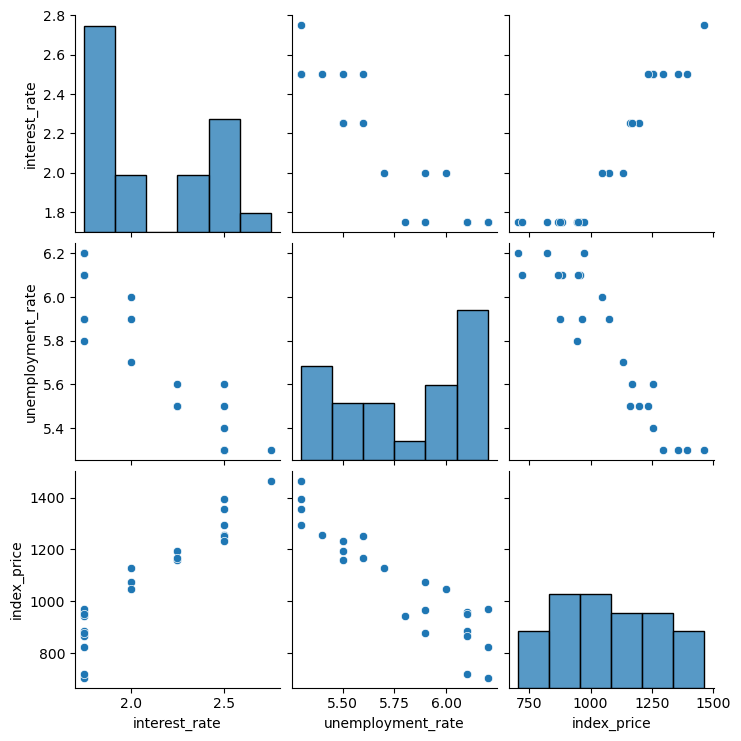

In [7]:
import seaborn as sns
sns.pairplot(df_index)
plt.show()

In [8]:
df_index.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


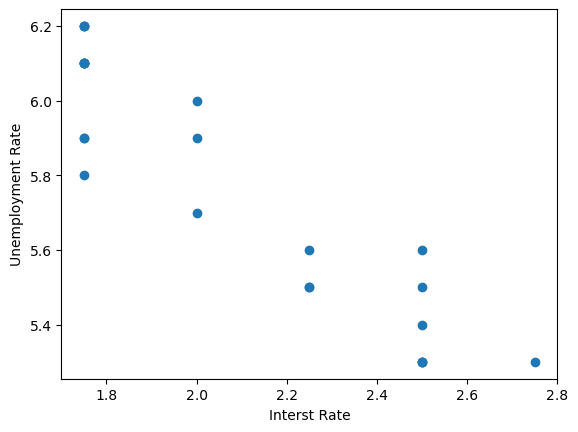

In [9]:
## Visualize Data Points more closely
plt.scatter(df_index['interest_rate'],df_index['unemployment_rate'])
plt.xlabel("Interst Rate")
plt.ylabel("Unemployment Rate")
plt.show()

In [10]:
# independent and dependent fature
X = df_index[["interest_rate","unemployment_rate"]]
y = df_index[["index_price"]]

In [11]:
X

,interest_rate,unemployment_rate
0,2.75,5.3
1,2.50,5.3
2,2.50,5.3
3,2.50,5.3
4,2.50,5.4
5,2.50,5.6
6,2.50,5.5
7,2.25,5.5
8,2.25,5.5
9,2.25,5.6


In [12]:
y

,index_price
0,1464
1,1394
2,1357
3,1293
4,1256
5,1254
6,1234
7,1195
8,1159
9,1167


In [13]:
# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25, random_state = 42)

In [14]:
import seaborn as sns

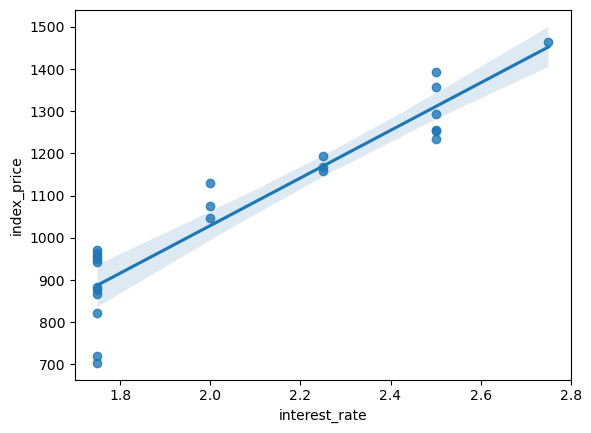

In [15]:
sns.regplot(x='interest_rate', y='index_price', data=df_index)
plt.show()

In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [18]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [19]:
reg.fit(X_train, y_train)

LinearRegression()

In [20]:
# cross validation
from sklearn.model_selection import cross_val_score
validation_score = cross_val_score(reg, X_train, y_train, scoring = 'neg_mean_squared_error', cv = 3)

In [21]:
validation_score

array([-4921.61331265, -7686.87497294, -5135.9962549 ])

In [22]:
np.mean(validation_score)

np.float64(-5914.828180162396)

In [23]:
## prediction
y_pred = reg.predict(X_test)

In [24]:
## Performance Metrics 
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [25]:
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
rmse = np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

8108.567426306611
73.80444932337099
90.04758423359624


In [26]:
from sklearn.metrics import r2_score
r_squared = r2_score(y_test, y_pred)
print(r_squared)

0.7591371539010254


In [27]:
#adjusted r_squared
Adjusted_R_Squared = 1 - ((1 - r_squared) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1))
print(Adjusted_R_Squared)

0.5985619231683756


## Assumptions

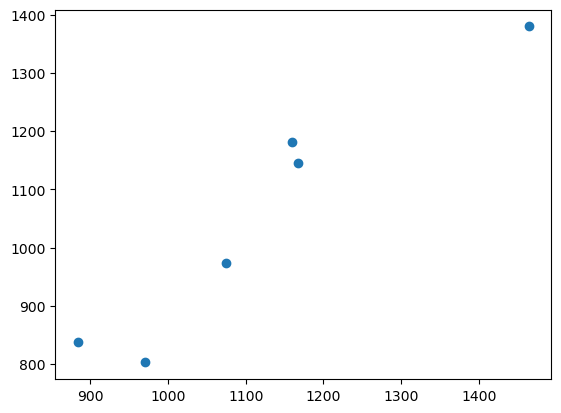

In [28]:
plt.scatter(y_test, y_pred)
plt.show()

## In the above diagram we can see that between y_test and y_pred there is a linear relationship that means the model has performed well 

In [29]:
residuals = y_test - y_pred
print(residuals)

    index_price
8    -21.746681
16   168.257203
0     84.165430
18    45.474004
11   101.146860
9     22.036518


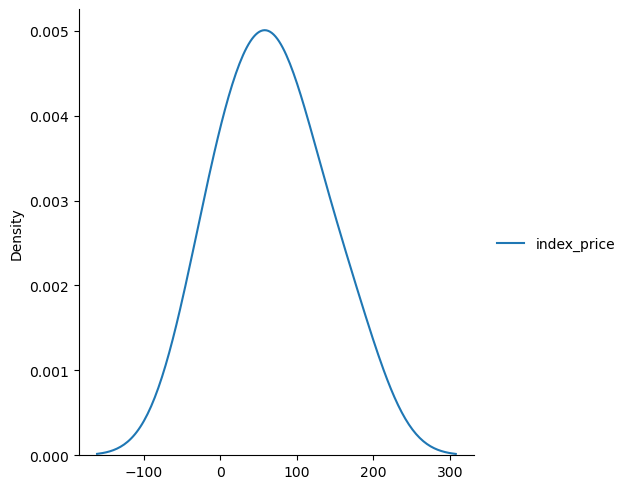

In [30]:
## plot the residuals
sns.displot(residuals, kind = 'kde')
plt.show()

In [31]:
reg.coef_ #slope # 1 unit moment on the xaxis leads to 17.29 moment on the yaxis

array([[  88.27275507, -116.25716066]])

In [32]:
reg.intercept_ #intercept 

array([1053.44444444])